# Project 0 - Plinko Board with Histogram 

By: Mike Blanchard and Reilly Kobbe

Date: 1-31-22

Professor: Dr. Titus 

For the first project, Mike and I decided to look into the Plinko Board. A Plinko board is a game where the player takes a chip or a ball and drops a box that has pins located in it. The ball then bounces off of each of the pins until it reaches the bottom of the board. 

We wanted to study collisions and the force of gravity with this project. What effects does the starting position have on the way the ball collides with the rods? Below we will discuss the scientific process we went through from measuring the ball drop. 
Let's Start with our simulation 

## Plinko Board Model 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import pandas as pd
from vpython import *

<IPython.core.display.Javascript object>

# Defining all of the variables used

Our first step in creating our Plinko board was defining variables. 

If we change the value of our variables like Rrod, it affects the values of the radius of the ball as well. When having a smaller Rrod value, the ball can make a more direct path to the bottom of the board. However, when the Rrod value is larger, it affects the rod size and the size of the ball making it more difficult for the ball to find a path to the bottom of the board.

In [2]:
m = 2 #mass of an atom
g = 9.8 #gravity 
rods = [] # empty list to store to append the rods inside of 
Rrod = .2 #radius of the rod 
Rball = 2 * Rrod #radius of ball
Fgrav = vec(0,-m*g,0) #force of gravity

time = []
xaxis=[]

#lists of histogram 
tlist = []
vzlist = []
klist = []
    
#time and time displacement 
dt = .001 #updates pos every .001 seconds 

# Creating our board

Next, we decided it was time to create our board. 

First, we declared our ball and created a variable for the velocity of the ball. We used a while loop so we could ensure that every time we ran our board, the ball started in a random spot.

We started by declaring each side of the wall, making them have a length of 20, and all being positioned along with the (10, -10) range so that each wall was connecting. 

When we were placing the rods, we needed to create two nested loops. Having two nested loops allowed the rods' height and width to be treated uniquely for the even and odd placed rods, ensuring that every other rod was placed exactly where it needed to be. We used our empty rods list to append each of our rods. 


In [3]:
scene1 = canvas(title = "Blanchard Kobbe Plinko Board 1.31.22")

ball = sphere(pos=vec(rand.uniform(-4,4),10,1), radius=Rball, color=color.cyan) #create ball
ball.v = vec(rand.uniform(-2,2),0,0) #velocity of ball 

#loop to randomly position ball at the start 
while ball.v == 0:
    ball.v.x = rand.uniform(-2,2)

# Creating the sides of our board
Lwall = box(pos = vec(-10, 0, 0), size = vec(1, 20, 1), color=color.white)
Rwall = box(pos = vec(10, 0, 0), size = vec(1, 20, 1), color=color.white)
Bwall = box(pos = vec(0, -10, 0), size = vec(20, 1, 1), color=color.white)

#Rods in the box i = height, j = width
for i in range(-8,9): 
    for j in range(-8,9):
        if i % 2 == 0: 
            rod = cylinder(pos=vec(i,-8,0),axis=vec(0,0,2), radius=Rrod, collided = False) #radius was .15
            rods.append(rod)
        elif j % 2 ==0:
            rod = cylinder(pos=vec(j,i,0),axis=vec(0,0,2), radius=Rrod, collided = False)
            rods.append(rod)
#Rods in the box k = height, j = width 
for k in range(-8,9): 
    for l in range(-8,9):
        if k % 2 != 0: 
            rod = cylinder(pos=vec(k,-8,0),axis=vec(0,0,2), radius=Rrod, collided = False)
            rods.append(rod)
        elif l % 2 !=0:
            rod = cylinder(pos=vec(l,k,0),axis=vec(0,0,2), radius=Rrod, collided = False)
            rods.append(rod) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Ball Drop

We started by setting our for loop to ten so we could have ten balls drop individually. We set the y-position of the ball to 10 along the width to ensure the ball is positioned at the top of the board. 

Our next while loop ran as long as the ball's width was greater than -10. This also helped us ensure that the ball was positioned on the board. 

Next, we have a loop that checked the collisions with each rod. We made sure that the center of our ball wasn’t at the center of our rod due to overlap. When we were able to check this, it allowed us to reverse the radius of the ball due to the collision. 

Lastly, we checked if 'end' had been met after each iteration of the for loop to append our time and the location on the X-axis.  

In [4]:
scene1.pause()

#For loop to control how many "ball drop" trials will be done
for i in range(10):
    t = 0 
    ball.pos.y = 10
    ball.v = vec(rand.uniform(-2,2),0,0) #velocity of ball 
    ball.pos.x = rand.uniform(-2,2) ##randomize the balls position
    while ball.pos.y > -10:
            end = False
            rate(10000000)

            ball.v = ball.v + Fgrav/m*dt
            ball.pos = ball.pos + ball.v*dt 

            #loop to check for a collision on each rod
            for i in range(len(rods)):
                rodcenter = rods[i].pos+rods[i].axis/2
                r = ball.pos - rodcenter
                if mag(r) < Rrod+Rball and rods[i].collided==False: #check collision
                    rhat = hat(r)
                    vballrad = dot(ball.v,rhat)*rhat #rad comp of ball.v
                    vballtan = ball.v - vballrad #tan comp of ball.v
                    vballrad = -vballrad * .5 #reverse ball.rad due to collision
                    ball.v = vballtan + vballrad #new ball velocity after colision
                    rods[i].collided=True
                elif mag(r) > Rrod+Rball and rods[i].collided==True:
                    rods[i].collided=False

            if ball.pos.x >= 9.5:
                ball.v.x = - abs(ball.v.x)
            elif ball.pos.x <= -9.5:
                ball.v.x = abs(ball.v.x)

            t = t + dt

    end = True 
    if end == True:
        xaxis.append(ball.pos.x)
        time.append(t)


## Our Histogram 

Plots where the ending location was on the X-axis and the adverage time it took. 

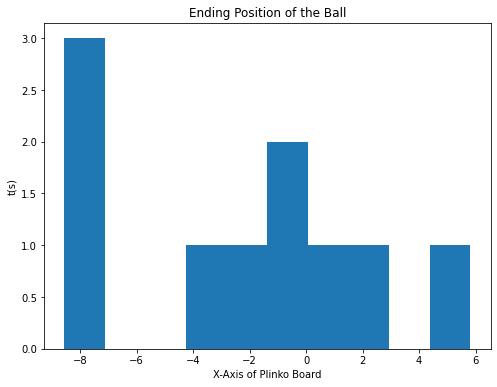

In [5]:
#creation of the histogram
fig = plt.figure(figsize=(8,6))
plt.title('Ending Position of the Ball')
plt.xlabel('X-Axis of Plinko Board')
plt.ylabel('t(s)')
plt.hist(xaxis)
plt.show()

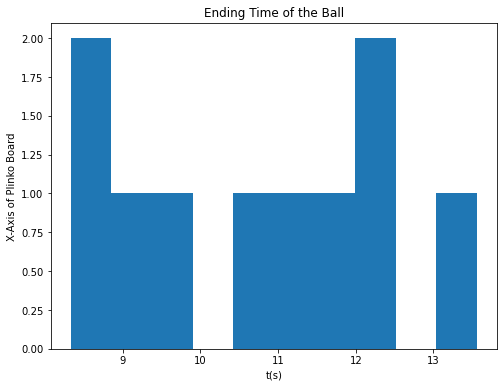

In [6]:
#creation of the histogram
fig = plt.figure(figsize=(8,6))
plt.title('Ending Time of the Ball')
plt.ylabel('X-Axis of Plinko Board')
plt.xlabel('t(s)')
plt.hist(time)
plt.show()

# Conclusion

In [7]:
avg=sum(xaxis)/len(xaxis)
print("average position on X-Axis after execution: ",round(avg,2))
avg2=sum(time)/len(time)
print("average time of execution: ",round(avg2,2))

average position on X-Axis after execution:  -2.19
average time of execution:  10.73


After running this experiment multiple times we could conclude that the mean speed typically falls to somewhere between 11 seconds. The average X-axis position also typically falls in the negatives, or on the left side on the (0,0) origin. What we can conclude from this is no matter the starting position on the board, the ball will always fall on a particular side of the board. This could be because of the angle at which our ball is being dropped into the board.